<a href="https://colab.research.google.com/github/Priya-gawhane/Machine-learning-prediction-Models-Projects/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

Data collection and preprocessing

In [3]:
stock_data = pd.read_csv('/content/TSLA.csv')
stock_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
stock_data.shape

(2416, 7)

In [5]:
stock_data[stock_data['Close'] == stock_data['Adj Close']].shape

(2416, 7)

In [6]:
stock_data = stock_data.drop(['Adj Close'], axis=1)

In [7]:
stock_data.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


In [8]:
stock_data.sample(8)

,Date,Open,High,Low,Close,Volume
1638,2016-12-29,218.559998,219.199997,214.119995,214.679993,4045000
1971,2018-04-27,285.369995,294.470001,283.829987,294.079987,4364600
1562,2016-09-12,195.000000,201.369995,194.100006,198.300003,3715200
2023,2018-07-12,321.429993,323.230011,312.769989,316.709991,5721200
184,2011-03-22,22.730000,22.860001,22.000000,22.190001,582900
1943,2018-03-19,316.500000,320.750000,309.670013,313.559998,7484300
391,2012-01-17,26.620001,27.340000,26.410000,26.600000,4651600
1477,2016-05-11,207.589996,215.479996,206.050003,208.960007,5161900


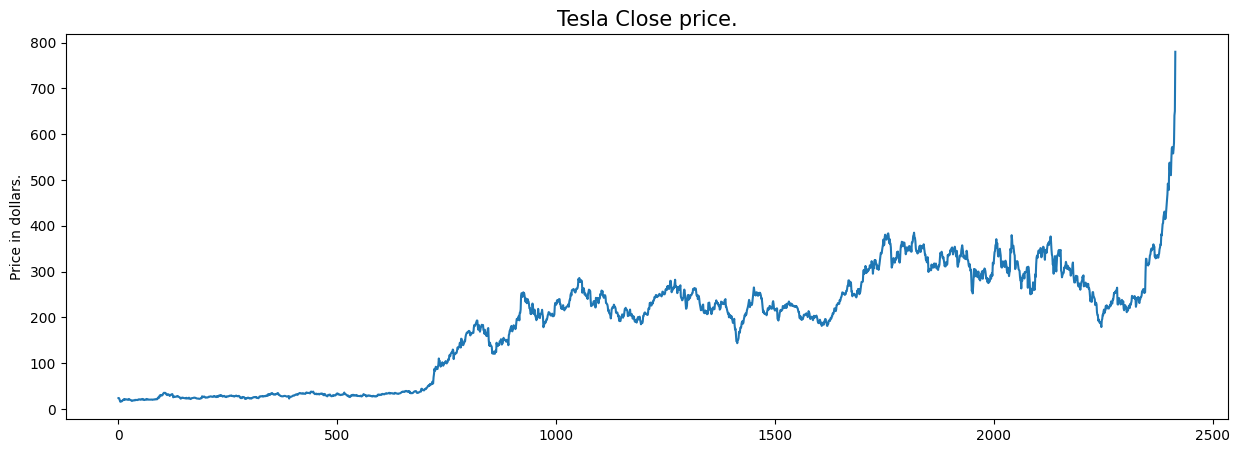

In [9]:
plt.figure(figsize=(15,5))
plt.plot(stock_data['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB


In [11]:
stock_data.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

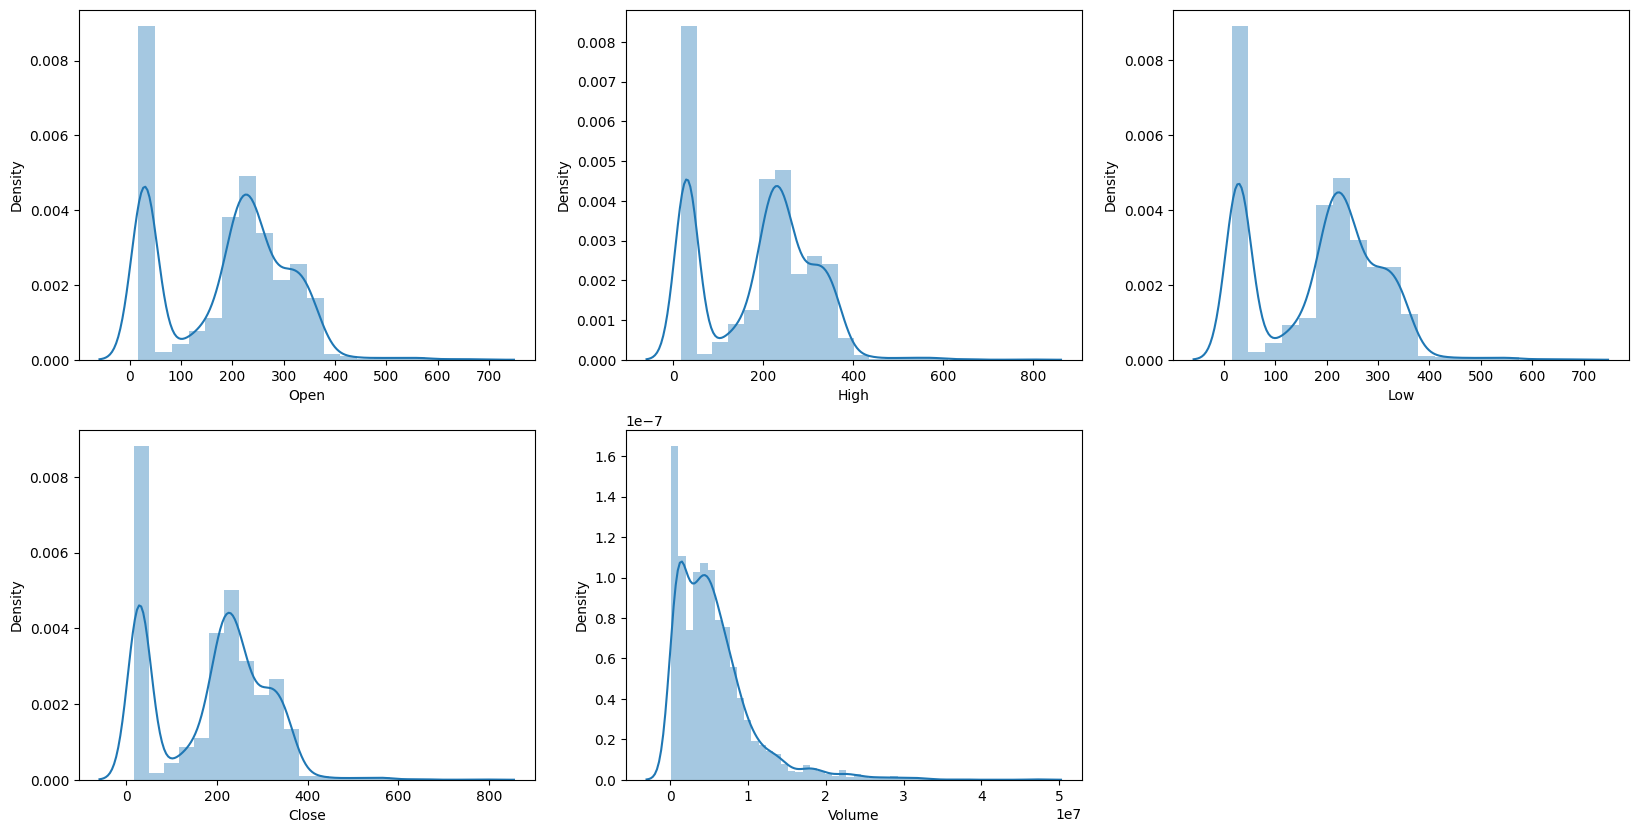

In [12]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(stock_data[col])
plt.show()

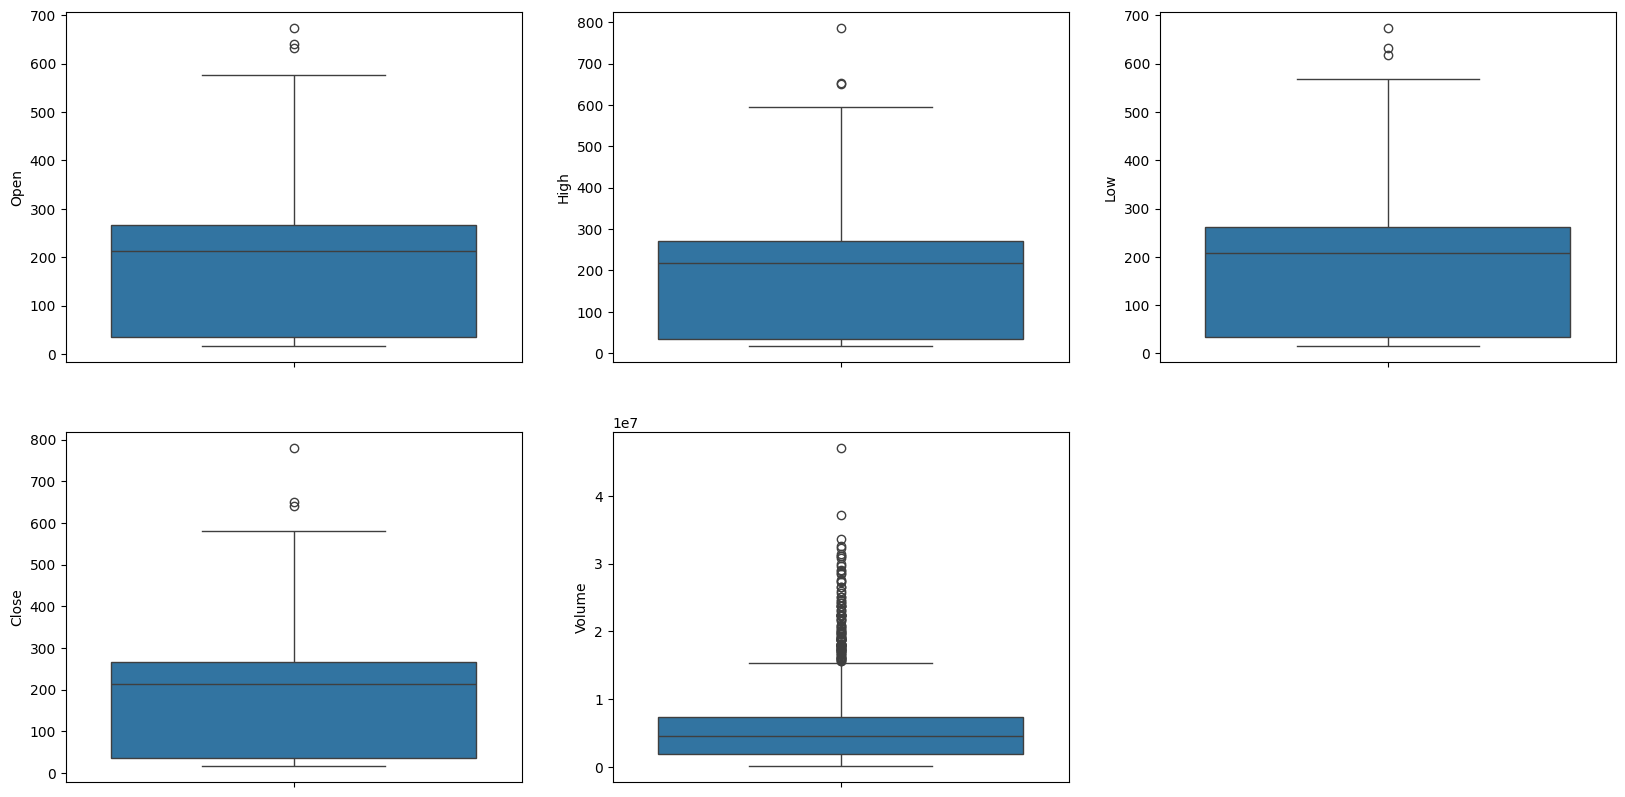

In [13]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(stock_data[col])
plt.show()

In [14]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')

# Split the date into day, month, and year columns
stock_data['day'] = stock_data['Date'].dt.day.astype('int')
stock_data['month'] = stock_data['Date'].dt.month.astype('int')
stock_data['year'] = stock_data['Date'].dt.year.astype('int')

stock_data.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [15]:
stock_data['is_quarter_end'] = np.where(stock_data['month']%3==0,1,0)
stock_data.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


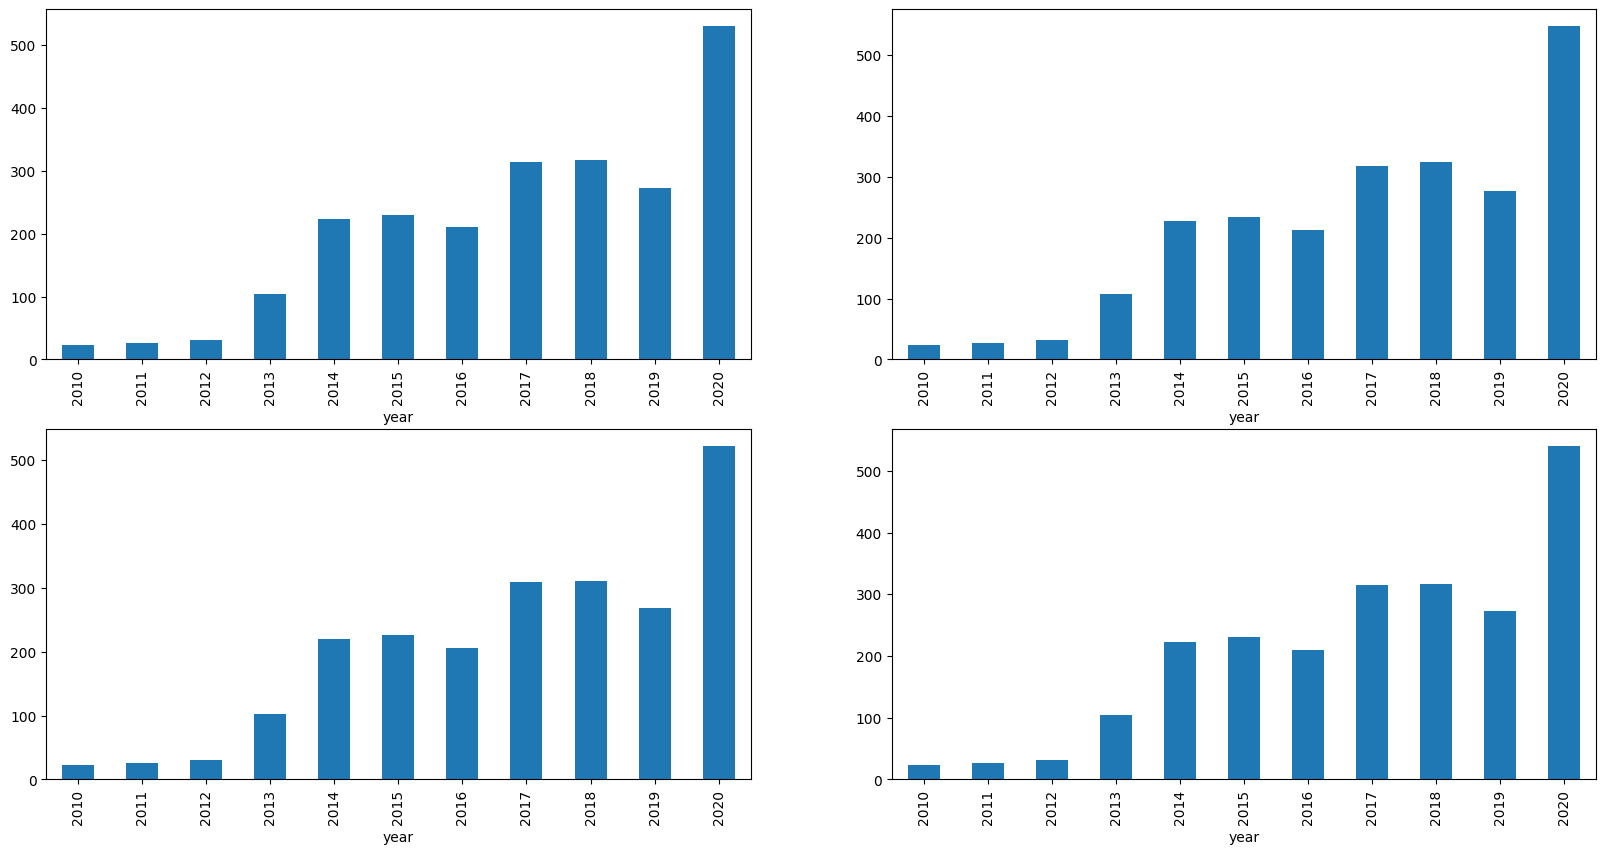

In [16]:
data_grouped = stock_data.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [17]:
stock_data['is_quarter_end'] = np.where(stock_data['month']%3==0,1,0)
stock_data.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


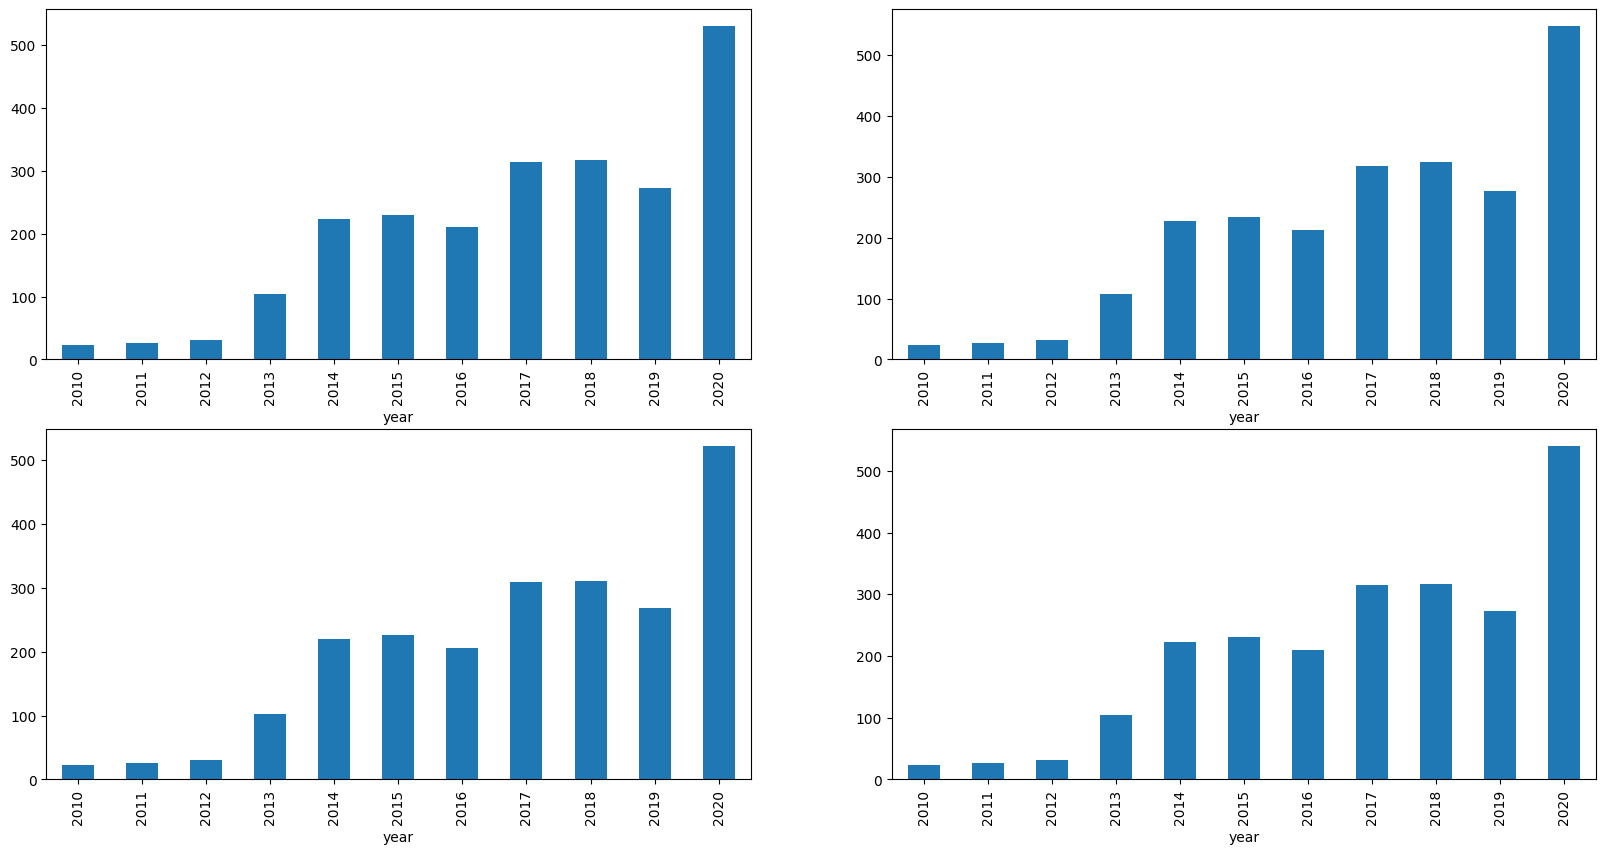

In [18]:
data_grouped = stock_data.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [19]:
stock_data.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


In [20]:
stock_data['open-close']  = stock_data['Open'] - stock_data['Close']
stock_data['low-high']  = stock_data['Low'] - stock_data['High']
stock_data['target'] = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1, 0)

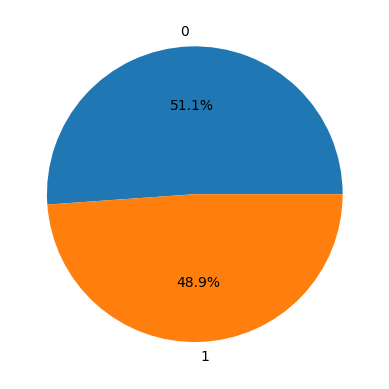

In [21]:
plt.pie(stock_data['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.

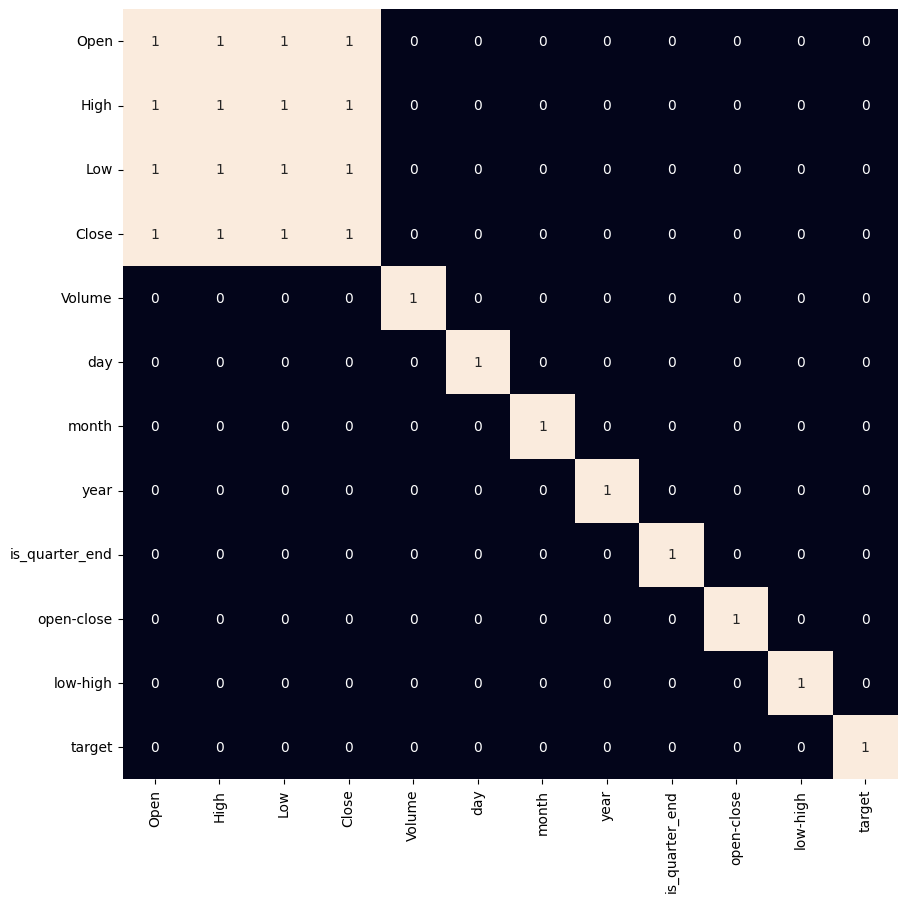

In [22]:
plt.figure(figsize=(10, 10))
sb.heatmap(stock_data.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [23]:
features = stock_data[['open-close', 'low-high', 'is_quarter_end']]
target = stock_data['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2174, 3) (242, 3)


In [24]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294580830338206
Validation Accuracy :  0.46257525998905313

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

In [25]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


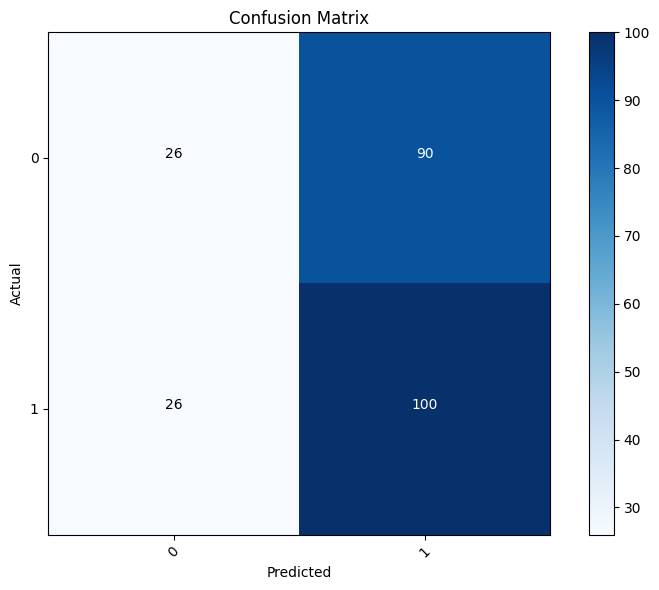

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

model = models[0]  # Select a model from your list

# Make predictions on the validation data
Y_pred = model.predict(X_valid)

# Create a confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(Y_valid)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [28]:
"""from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have actual labels (Y_valid) and predicted labels (Y_pred)
# These labels should be binary (0 or 1) for a classification problem

# Accuracy
accuracy = accuracy_score(Y_valid, Y_pred)

# Precision
precision = precision_score(Y_valid, Y_pred)

# Recall
recall = recall_score(Y_valid, Y_pred)

# F1 Score
f1 = f1_score(Y_valid, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")"""

'from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\n\n# Assuming you have actual labels (Y_valid) and predicted labels (Y_pred)\n# These labels should be binary (0 or 1) for a classification problem\n\n# Accuracy\naccuracy = accuracy_score(Y_valid, Y_pred)\n\n# Precision\nprecision = precision_score(Y_valid, Y_pred)\n\n# Recall\nrecall = recall_score(Y_valid, Y_pred)\n\n# F1 Score\nf1 = f1_score(Y_valid, Y_pred)\n\nprint(f"Accuracy: {accuracy:.2f}")\nprint(f"Precision: {precision:.2f}")\nprint(f"Recall: {recall:.2f}")\nprint(f"F1 Score: {f1:.2f}")'